# Notes

* which models are best
    * how fast are they ?
    * how much memory they consume?
    * how accurate they are ?

# code
## Libraries

In [1]:
%pip install timm

Note: you may need to restart the kernel to use updated packages.


In [2]:
from fastai.vision.all import *
import timm 


In [3]:
path = untar_data(URLs.PETS,)/'images'


In [4]:
Path()

Path('.')

In [5]:

dls = ImageDataLoaders.from_name_func('.',
                                       get_image_files(path),
                                       valid_pct=0.2,
                                       seed=143,
                                       label_func=RegexLabeller(pat=r'^([^/]+)_\d+'),
                                       item_tfms=Resize(224),)

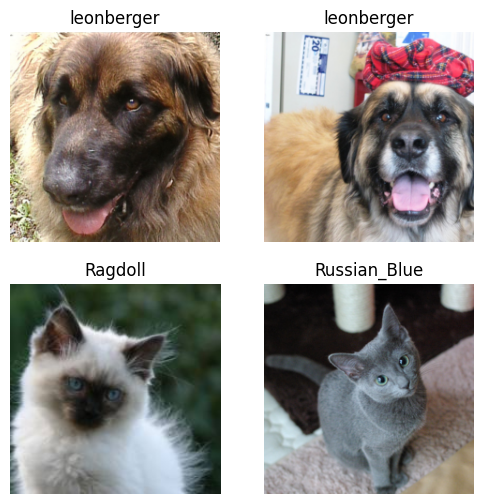

In [6]:
dls.show_batch(max_n=4)

In [7]:
learn = vision_learner(dls,
                       resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 133MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.510453,0.404679,0.123139,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.448106,0.370306,0.119756,00:27
1,0.288856,0.278742,0.094723,00:27
2,0.129303,0.241822,0.084574,00:27


we could try a better model, based on this analysis. the convenext mdels work great

In [8]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [9]:
learn = vision_learner(dls,
                       'convnext_tiny_in22k',
                       metrics=error_rate).to_fp16()


/opt/conda/lib/python3.10/site-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/178M [00:00<?, ?B/s]

In [10]:
learn.export('model.pkl')